<a href="https://colab.research.google.com/github/shazzad-hasan/practice-deep-learning-with-pytorch/blob/main/foundation_of_pytorch/linear_model_using_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2],
                    [8.6], [2.1], [8.0], [10.0], [4.5], [6.2], [4.0]], dtype=np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.5], [3.35], [2.6], [1.96],
                    [3.53], [1.76], [3.2], [3.5], [1.6], [2.5], [2.2]], dtype=np.float32)

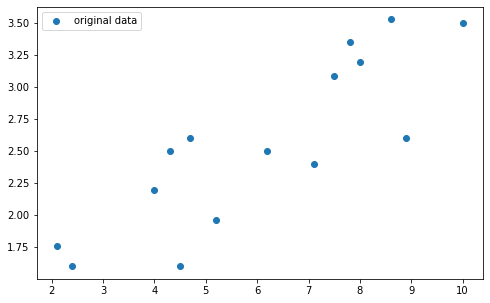

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, label="original data")
plt.legend()
plt.show()

In [ ]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print("requires_grad for X_train: ", X_train.requires_grad)
print("requires_grad for Y_train: ", Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [ ]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

In [ ]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [ ]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True)
w2.shape

torch.Size([1, 1])

In [ ]:
for i in range(1, 10):
  y_pred = X_train.mm(w1).mm(w2)
  loss = (y_pred - Y_train).pow(2).sum()

  print("iter: {}  loss: {}".format(i, loss))

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w1.grad.zero_()
    w2.grad.zero_()

iter: 1  loss: 5.130121231079102
iter: 2  loss: 4.236581325531006
iter: 3  loss: 4.22458553314209
iter: 4  loss: 4.224183559417725
iter: 5  loss: 4.224172115325928
iter: 6  loss: 4.2241716384887695
iter: 7  loss: 4.2241716384887695
iter: 8  loss: 4.2241716384887695
iter: 9  loss: 4.2241716384887695


In [ ]:
print("w1: ", w1)
print("w2: ", w2)

w1:  tensor([[0.4749]], requires_grad=True)
w2:  tensor([[0.8350]], requires_grad=True)


In [ ]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8000],
        [ 8.9000],
        [ 5.2000],
        [ 8.6000],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.2000],
        [ 4.0000]])

In [ ]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8636],
        [0.9516],
        [2.9739],
        [2.8153],
        [1.7050],
        [3.0928],
        [3.5290],
        [2.0619],
        [3.4100],
        [0.8327],
        [3.1721],
        [3.9652],
        [1.7843],
        [2.4584],
        [1.5861]], grad_fn=<MmBackward0>)

In [ ]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8636311 ],
       [0.9516415 ],
       [2.9738798 ],
       [2.8152728 ],
       [1.7050245 ],
       [3.092835  ],
       [3.5290039 ],
       [2.06189   ],
       [3.410049  ],
       [0.83268625],
       [3.1721385 ],
       [3.9651728 ],
       [1.7843277 ],
       [2.4584072 ],
       [1.5860692 ]], dtype=float32)

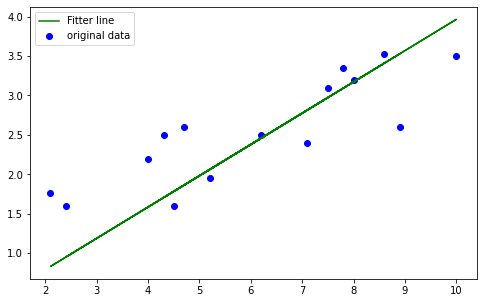

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, label="original data", c='b')
plt.plot(x_train, predicted, label="Fitter line", c='g')
plt.legend()
plt.show()